<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/G_g_p_p0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
from astropy.coordinates import cartesian_to_spherical
import pandas as pd
import scipy as sp
from sklearn.neighbors import KDTree
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
###############################################################################
# Data taken from a r=75A Au FCC Sphere
###############################################################################
NN_distance = [np.sqrt(1/2), np.sqrt(2/2), np.sqrt(3/2), np.sqrt(4/2), np.sqrt(5/2), np.sqrt(6/2), np.sqrt(7/2), np.sqrt(8/2), np.sqrt(9/2), np.sqrt(10/2),
            np.sqrt(11/2), np.sqrt(12/2), np.sqrt(13/2), np.sqrt(14/2), np.sqrt(15/2), np.sqrt(16/2), np.sqrt(17/2), np.sqrt(18/2), np.sqrt(19/2), np.sqrt(20/2),
            np.sqrt(21/2), np.sqrt(22/2), np.sqrt(23/2), np.sqrt(24/2), np.sqrt(25/2), np.sqrt(26/2), np.sqrt(27/2)]
NN_count = [12, 6, 24, 12, 24, 8, 48, 6, 36, 24,
         24, 24, 72, 0, 48, 12, 48, 30, 72, 24,
         48, 24, 48, 8, 84, 24, 96]

In [3]:
file = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Control/STRs/Sphere100_Au_onAu_voidless.stru"
lp = 4.0789

In [4]:
data = pd.read_csv(file, skiprows=3)
data = data.drop(data.columns[3:], axis=1)
data[["atoms", "x"]] = data[data.columns[0]].str.split(expand=True)
data = data.drop(data.columns[0], axis=1)
data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data["x"] = data["x"].astype(float)
data["y"] = data["y"].astype(float)
data["z"] = data["z"].astype(float)

<ipython-input-4-14b7be25f260>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)


In [5]:
atom = data.atom
data = data.drop(data.columns[2], axis=1)

In [6]:
data

,y,z,x
0,-2.5,-5.5,-1.0
1,-2.5,-5.5,0.0
2,-2.5,-5.5,1.0
3,-1.5,-5.5,-2.0
4,-2.0,-5.5,-1.5
...,...,...,...
3920,0.5,6.0,-0.5
3921,0.0,6.0,0.0
3922,0.5,6.0,0.5
3923,0.0,6.0,1.0


In [7]:
data_ar = data.to_numpy()
#tree = KDTree(data_ar, leaf_size=2)
#all_nn_indices = tree.query_radius(data_ar, r=np.sqrt(2)*1)

In [8]:
r_min = .1
r_max = np.sqrt(6/2)*lp
bin_size = (1/2)*np.sqrt(1/2)

range = np.arange(r_min,r_max+bin_size, bin_size)
rho_r = []
N = len(data_ar)
for r in range:
  print(r)
  count = 0
  for i in data_ar:
    for j in data_ar:
      if abs(r-np.linalg.norm(i-j)*lp) <= bin_size/6:    # finds the distance between the atom at index i and index n
        count = count +1
  rho_r.append( 1/(4*np.pi*r*r*N) * count)

0.1
0.4535533905932738
0.8071067811865477
1.1606601717798215
1.5142135623730955
1.8677669529663694
2.221320343559643
2.574873734152917
2.928427124746191
3.2819805153394648
3.6355339059327387
3.9890872965260122
4.342640687119285
4.696194077712559
5.049747468305833
5.403300858899107
5.756854249492381
6.110407640085655
6.463961030678929
6.817514421272203
7.171067811865477


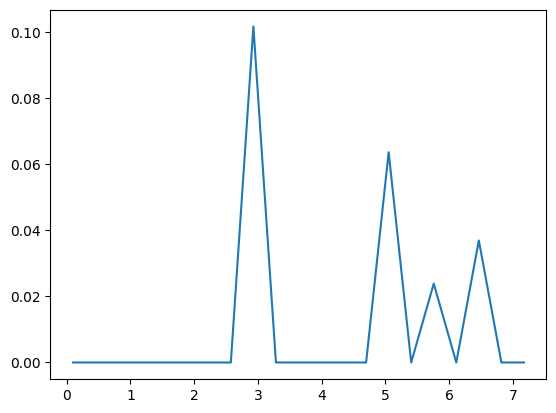

In [9]:
plt.plot(range,rho_r)